# Predicting Airbnb Prices in United States
**Team 4 - 21KDL**

* [**Introduction**](#introduction)
* [**Importing libraries and data**](#import)
* [**Data Preprocessing**](#preprocessing)
* [**Data Transformation and Feature Engineering**](#transformation)
* [**Building model**](#model)
* [**Conclusions**](#conclusions)

<a id='introduction'></a>

# Introduction

**Predicting Airbnb Prices in the United States**
The project aims to analyze and predict the prices of Airbnb listings across different cities in the United States. The data utilized for this project is obtained from Inside Airbnb, specifically from the website http://insideairbnb.com/get-the-data/.

### <ins>**Inside Airbnb Data**<ins>
Inside Airbnb provides extensive data resources and tools to explore and analyze Airbnb listings in various cities worldwide. The website offers detailed listings data, calendar data, and review data for each city. Additionally, it includes summary information and metrics for each city, as well as neighborhood information for geographical filtering.

### <ins>**Project Objective**<ins>
The objective of this project is to develop a predictive model that can estimate the price of an Airbnb listing based on various features such as location, property type, amenities, and reviews. By leveraging the available dataset, we can analyze the factors that significantly influence the pricing of Airbnb accommodations in different regions of the United States.

### <ins>**Benefits for Hosts and Guests**<ins>
The insights gained from this analysis can be beneficial for both hosts and guests. Hosts can optimize their pricing strategies by understanding the key factors that contribute to higher rental prices. On the other hand, guests can make informed decisions when selecting suitable Airbnb accommodations based on their preferences and budget.

### <ins>**Methodology**<ins>
The project will utilize machine learning techniques to build an accurate and reliable predictive model. By training the model on the Inside Airbnb dataset, we aim to provide users with a tool that can assist in estimating Airbnb prices in the United States. This project has the potential to provide valuable insights into the dynamics of the short-term rental market and contribute to the broader understanding of the factors influencing Airbnb pricing strategies.

<a id='introduction'></a>

# Importing libraries and data

## Install some libraries for model and processing data

In [ ]:
# Install some necessary packages
# !pip install xgboost
!pip install catboost
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.6/230.6 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 9.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from tqdm import tqdm
tqdm.pandas()

import warnings
warnings.filterwarnings("ignore")

import requests
from io import BytesIO

import gzip
import os
import shutil
import pickle
from zipfile import ZipFile
from google.colab import files

In [ ]:
pd.set_option('display.max_columns', None)

## Load and merge data

The ``cities`` list contains information about various cities in the US. Each entry in the list is a tuple that includes the city name, state abbreviation, and a date.

Here is an explanation of the information in each tuple:

*   **City name:** The name of the city.
*   **State abbreviation:** The abbreviation of the state where the city is located.
*   **Date:** A specific date associated with the city.

For example, the first entry in the list is ("asheville", "nc", "2023-09-13"), which represents the city of Asheville in North Carolina, and the associated date is September 13, 2023.

The list provides a collection of cities and their relevant information.

In [ ]:
# List of cities and relevant information
# In this project we only use data of US
cities = [
     ("asheville", "nc", "2023-09-13"),
    ("austin", "tx", "2023-09-10"),
    ("boston", "ma", "2023-09-16"),
    ("bozeman", "mt", "2023-10-08"),
    ("broward-county", "fl", "2023-09-21"),
    ("cambridge", "ma", "2023-09-23"),
    ("chicago", "il", "2023-09-12"),
    ("clark-county-nv", "nv", "2023-09-16"),
    ("columbus", "oh", "2023-09-22"),
    ("dallas", "tx", "2023-09-12"),
    ("denver", "co", "2023-09-24"),
    ("fort-worth", "tx", "2023-09-07"),
    ("hawaii", "hi", "2023-09-10"),
    ("jersey-city", "nj", "2023-09-18"),
    ("los-angeles", "ca", "2023-09-03"),
    ("nashville", "tn", "2023-09-16"),
    ("new-orleans", "la", "2023-09-03"),
    ("new-york-city", "ny", "2023-10-01"),
    ("newark", "nj", "2023-09-25"),
    ("oakland", "ca", "2023-09-18"),
    ("pacific-grove", "ca", "2023-09-25"),
    ("portland", "or", "2023-09-17"),
    ("rhode-island", "ri", "2023-09-25"),
    ("rochester", "ny", "2023-10-23"),
    ("salem-or", "or", "2023-09-18"),
    ("san-diego", "ca", "2023-09-18"),
    ("san-francisco", "ca", "2023-09-02"),
    ("san-mateo-county", "ca", "2023-09-18"),
    ("santa-clara-county", "ca", "2023-09-18"),
    ("santa-cruz-county", "ca", "2023-09-25"),
    ("seattle", "wa", "2023-09-18"),
    ("twin-cities-msa", "mn", "2023-09-17"),
    ("washington-dc", "dc", "2023-09-13")
]

Create function `download_listings_data` function is designed to download data from website `http://data.insideairbnb.com` in United State for a specific city, state, and date.

We used `requests` library to to make an HTTP request and fetches the data in CSV format. The data is then read into a Pandas DataFrame using pd.read_csv after decompressing the content using the `gzip` library.

In [ ]:
def download_listings_data(city, state, date):
    # Full path to data on Inside Airbnb website
    url = f"http://data.insideairbnb.com/united-states/{state}/{city}/{date}/data/listings.csv.gz"
    response = requests.get(url)

    if response.status_code == 200:
        with gzip.open(BytesIO(response.content)) as file:
            city_listings_df = pd.read_csv(file, encoding='utf-8')
            return city_listings_df
    else:
        print(f"Unable to download data for {city}, {state}. Error code: {response.status_code}")
        return None

In [ ]:
# Create a dictionary to store the downloaded listings data for each city
city_listings_df = {
    f"{city}".replace("-", "_"):  # Use city name as the key (with replaced dashes)
        download_listings_data(city, state, date)  # Download listings data for each city
    for city, state, date in tqdm(cities, desc="Downloading Data")
    if download_listings_data(city, state, date) is not None  # Only store data if it is successfully downloaded
}

After download data, it creates `city_listings_df[city]` with `city` in `cities`

In [ ]:
city_listings_df['austin'].head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5456,https://www.airbnb.com/rooms/5456,20230910055936,2023-09-10,city scrape,Guesthouse in Austin · ★4.84 · 1 bedroom · 2 b...,Week of July 31 - Aug 10 require min of 5 nig...,My neighborhood is ideally located if you want...,https://a0.muscache.com/pictures/14084884/b5a3...,8028,https://www.airbnb.com/users/show/8028,Sylvia,2009-02-16,"Austin, TX",I am a licensed Real Estate Broker and owner o...,within an hour,100%,97%,t,https://a0.muscache.com/im/users/8028/profile_...,https://a0.muscache.com/im/users/8028/profile_...,East Downtown,1.0,4.0,"['email', 'phone']",t,t,"Austin, Texas, United States",78702,NaN,30.26057,-97.73441,Entire guesthouse,Entire home/apt,3,NaN,1 bath,1.0,2.0,"[""Air conditioning"", ""Hot water"", ""Dishes and ...",$126.00,2,90,1,2,90,90,2.0,90.0,NaN,t,8,19,41,306,2023-09-10,657,42,4,2009-03-08,2023-08-27,4.84,4.87,4.85,4.90,4.83,4.73,4.79,NaN,f,1,1,0,0,3.72
1,5769,https://www.airbnb.com/rooms/5769,20230910055936,2023-09-11,previous scrape,Home in Austin · ★4.90 · 1 bedroom · 1 bed · 1...,<b>The space</b><br />Looking for a comfortabl...,Quiet neighborhood with lots of trees and good...,https://a0.muscache.com/pictures/23822033/ac94...,8186,https://www.airbnb.com/users/show/8186,Elizabeth,2009-02-19,"Austin, TX",We're easygoing professionals that enjoy meeti...,within an hour,100%,91%,t,https://a0.muscache.com/im/users/8186/profile_...,https://a0.muscache.com/im/users/8186/profile_...,SW Williamson Co.,1.0,4.0,"['email', 'phone', 'work_email']",t,t,"Austin, Texas, United States",78729,NaN,30.45697,-97.78422,Private room in home,Private room,2,NaN,1 shared bath,NaN,1.0,"[""Wifi \u2013 47 Mbps"", ""Lock on bedroom door""...",$45.00,1,14,1,1,14,14,1.0,14.0,NaN,t,0,0,0,0,2023-09-11,290,21,0,2010-04-10,2023-08-04,4.90,4.90,4.87,4.91,4.94,4.76,4.92,NaN,f,1,0,1,0,1.77
2,6413,https://www.airbnb.com/rooms/6413,20230910055936,2023-09-11,previous scrape,Guesthouse in Austin · ★4.97 · Studio · 1 bed ...,"Great studio apartment, perfect a single perso...",Travis Heights is one of the oldest neighborho...,https://a0.muscache.com/pictures/miso/Hosting-...,13879,https://www.airbnb.com/users/show/13879,Todd,2009-04-17,"Austin, TX","We're a young family that likes to travel, we ...",within a few hours,100%,100%,f,https://a0.muscache.com/im/pictures/user/4f35e...,https://a0.muscache.com/im/pictures/user/4f35e...,Travis Heights,1.0,1.0,"['email', 'phone']",t,t,"Austin, Texas, United States",78704,NaN,30.24885,-97.73587,Entire guesthouse,Entire home/apt,2,NaN,1 bath,NaN,1.0,"[""Conditioner"", ""Clothing storage: walk-in clo...",$57.00,30,90,30,30,90,90,30.0,90.0,NaN,t,0,0,0,0,2023-09-11,122,3,0,2009-12-14,2022-10-17,4.97,4.99

After that, we merge the individual DataFrames in the ``city_listings_df`` dictionary into a **single** DataFrame ``listings_df``. It adds a new ``city`` column to each df indicating the corresponding city, and then concatenates them. Finally, it rearranges the column order so that the ``city`` column is the first column in the merged df.

In [ ]:
# Merge DataFrames in city_listings_df and add column "city"
merged_dfs = []
for city, df in city_listings_df.items():
    df_with_city = df.assign(city=city)
    merged_dfs.append(df_with_city)

# Merge DataFrames with the "city" column added into a single DataFrame
listings_df = pd.concat(merged_dfs)

# Put the "city" column first
cols = listings_df.columns.tolist()
cols = ['city'] + [col for col in cols if col != 'city']
listings_df = listings_df.reindex(columns=cols)

Let look at randomly sample 20 rows from the DataFrame listings_df.

In [ ]:
listings_df.sample(20, random_state=42)

,city,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
1415,columbus,704952462674331178,https://www.airbnb.com/rooms/704952462674331178,20230922043113,2023-09-22,city scrape,Home in Columbus · ★5.0 · 3 bedrooms · 4 beds ...,This stylish home is perfect for those looking...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,93033733,https://www.airbnb.com/users/show/93033733,Wayne,2016-09-01,"Columbus, OH",NaN,within an hour,100%,98%,f,https://a0.muscache.com/im/pictures/user/51bb9...,https://a0.muscache.com/im/pictures/user/51bb9...,Hilltop,6.0,6.0,"['email', 'phone']",t,t,NaN,Hilltop,NaN,39.951160,-83.084090,Entire home,Entire home/apt,6,NaN,1.5 baths,3.0,4.0,"[""Central heating"", ""Free street parking"", ""Sh...",$176.00,2,30,2,2,2,1125,2.0,1060.9,NaN,t,19,47,77,77,2023-09-22,20,20,2,2022-10-20,2023-09-17,5.00,5.00,4.80,5.00,5.00,4.85,4.95,2022-2894,f,6,6,0,0,1.78
321,asheville,14934441,https://www.airbnb.com/rooms/14934441,20230913045235,2023-09-13,city scrape,Home in Asheville · ★4.90 · 3 bedrooms · 5 bed...,"Clean, safe, peaceful 1970's ranch style home ...","-""Nanny's Place "" is located in Buncombe count...",https://a0.muscache.com/pictures/ce702879-5134...,20943262,https://www.airbnb.com/users/show/20943262,Roslyn,2014-09-04,"Asheville, NC","Proud USAF veteran. Love to travel, favorite ...",within an hour,100%,99%,t,https://a0.muscache.com/im/pictures/user/9bf99...,https://a0.muscache.com/im/pictures/user/9bf99...,NaN,1.0,1.0,"['email', 'phone', 'work_email']",t,f,"Asheville, North Carolina, United States",28803,NaN,35.555160,-82.512900,Entire home,Entire home/apt,10,NaN,2 baths,3.0,5.0,"[""Private hot tub"", ""DOVE and TRESemm\u00e9 br...",$170.00,2,7,1,2,1125,1125,1.1,1125.0,NaN,t,2,7,21,72,2023-09-13,525,82,5,2016-10-17,2023-08-28,4.90,4.92,4.96,4.97,4.98,4.85,4.90,NaN,f,1,1,0,0,6.24
682,portland,12699642,https://www.airbnb.com/rooms/12699642,20230917033746,2023-09-17,city scrape,Guesthouse in Portland · ★4.98 · 1 bedroom · 2...,Welcome to our little house! Located in the wo...,Located in NE Portland's Rose City Park Neighb...,https://a0.muscache.com/pictures/6b1c4b8e-0a32...,69029284,https://www.airbnb.com/users/show/69029284,Jenni,2016-04-26,"Portland, OR",Hey Everyone! My husband Matt and I are Oregon...,within an hour,100%,100%,NaN,https://a0.muscache.com/im/pictures/user/a1caa...,https://a0.muscache.com/im/pictures/user/a1caa...,Rose City Park,2.0,2.0,"['email', 'phone']",t,t,"Portland, Oregon, United States",Rose City Park,NaN,45.532650,-122.603790,Entire guesthouse,Entire home/apt,4,NaN,1 bath,1.0,2.0,"[""Hair dryer"", ""Body soap"", ""Microwave"", ""Fire...",$90.00,2,1125,2,5,1125,1125,2.1,1125.0,NaN,t,14,41,56,119,2023-09-17,458,59,3,2017-08-15,2023-09

In [ ]:
listings_df.shape

(282377, 76)

## EDA

We will draw a horizontal bar plot that visualizes the number of listings per city in the United States. The resulting plot will provides us insights into the distribution of Airbnb listings across different cities.

In [ ]:
# Create DataFrame df1 with the number of listings per city
df1 = listings_df["city"].value_counts().reset_index().rename(columns={"index": "city", "city": "count"}).sort_values("count", ascending=False)

# Create horizontal bar plot using Plotly Express
fig = px.bar(df1, x="count", y="city", orientation="h")

# Update layout with title, axis labels, font size, reversed y-axis, and increased height
fig.update_layout(
    title="Number of Listings: City-wise (United States)",
    xaxis_title="Count",
    yaxis_title="City",
    font=dict(size=14),
    yaxis=dict(autorange="reversed"),
    height=800  # Increase the height to accommodate all cities
)

# Display the figure
fig.show()

It can be seen that large cities such as Los Angeles, New York City or Hawaii (over 30K) have a large number of rental homes compared to less attractive cities such as Salem Or and Pacific Grove,...( <400).

Let's check how many types of rooms are available for rent

In [ ]:
import plotly.graph_objects as go
df1 = listings_df.groupby("room_type").count()["city"].reset_index().sort_values("city", ascending=False)

# Create bar plot using Plotly
fig = go.Figure(data=[go.Bar(
    x=df1["city"],
    y=df1["room_type"],
    orientation='h'
)])

# Customize the layout
fig.update_layout(
    title="Number of Listings by Room Type",
    xaxis_title="Count",
    yaxis_title="Room Type",
    font=dict(size=14),
    yaxis=dict(autorange="reversed")
)

# Show the figure
fig.show()

Its clearly that room types such as Entire Room/apt will usually be rented mainly rooms such as Private Room, Shared Room or Hotel Room.

<a id='introduction'></a>

# Data Preprocessing

## Check null and duplicates values

In [ ]:
listings_df.info(max_cols = 80)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282377 entries, 0 to 6704
Data columns (total 76 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   city                                          282377 non-null  object 
 1   id                                            282377 non-null  int64  
 2   listing_url                                   282377 non-null  object 
 3   scrape_id                                     282377 non-null  int64  
 4   last_scraped                                  282377 non-null  object 
 5   source                                        282377 non-null  object 
 6   name                                          282377 non-null  object 
 7   description                                   279962 non-null  object 
 8   neighborhood_overview                         173079 non-null  object 
 9   picture_url                                   2823

We count the number of null values in each column of the listings_df and filters out the columns that have null values.

In [ ]:
# Count null values ​​in each column
null_counts = listings_df.isnull().sum()

# Filter out columns with null values
cols_with_null = null_counts[null_counts > 0]

# Show columns with null values
cols_with_null

description                       2415
neighborhood_overview           109298
picture_url                          1
host_name                           15
host_since                          15
host_location                    61650
host_about                      112670
host_response_time               47064
host_response_rate               47064
host_acceptance_rate             39042
host_is_superhost                 5734
host_thumbnail_url                  15
host_picture_url                    15
host_neighbourhood               57875
host_listings_count                 15
host_total_listings_count           15
host_has_profile_pic                15
host_identity_verified              15
neighbourhood                   109294
neighbourhood_cleansed             903
neighbourhood_group_cleansed    153474
bathrooms                       282377
bathrooms_text                     351
bedrooms                         72206
beds                              2974
calendar_updated         

`col_with_null` has some feature that has a large null so we can remove it, then we check the duplicates

In [ ]:
num_duplicates = listings_df.duplicated(subset=None, keep='first').sum()
print(num_duplicates)

0


## Remove unnecessary columns, drop null and duplicates value

In [ ]:
listings_df.columns

Index(['city', 'id', 'listing_url', 'scrape_id', 'last_scraped', 'source',
       'name', 'description', 'neighborhood_overview', 'picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_n

We will remove some columns that have no relationship with price or unneccessary

In [ ]:
unnecessary_columns = ['source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'listing_url', 'scrape_id', 'last_scraped', 'host_id',
                   'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'neighbourhood_group_cleansed',
                   'neighbourhood_cleansed', 'bathrooms', 'calendar_updated', 'license', 'host_neighbourhood', 'first_review', 'last_review', 'host_listings_count',
                   'calendar_last_scraped', 'neighbourhood', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes',
                   'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'minimum_minimum_nights', 'maximum_minimum_nights',
                   'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'number_of_reviews_l30d',
                   'number_of_reviews_ltm', 'property_type','bathrooms_text']

listings_df = listings_df.drop(columns=unnecessary_columns)

In [ ]:
listings_df.shape

(282377, 35)

In [ ]:
# Remove null values
listings_df = listings_df.dropna()

In [ ]:
# Remove duplicate values
listings_df = listings_df.drop_duplicates()

In [ ]:
listings_df.head(5)

,city,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,latitude,longitude,room_type,accommodates,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,asheville,3314819,within an hour,100%,99%,t,3.0,"['email', 'phone']",t,t,35.49233,-82.51495,Private room,3,1.0,1.0,"[""Air conditioning"", ""Babysitter recommendatio...",$47.00,1,7,t,17,39,66,66,1234,4.75,4.90,4.77,4.93,4.86,4.81,4.88,f,10.99
1,asheville,108061,within an hour,100%,88%,t,3.0,"['email', 'phone']",t,t,35.60562,-82.55512,Entire home/apt,2,1.0,1.0,"[""Freezer"", ""BBQ grill"", ""Kitchen"", ""Dining ta...",$100.00,30,365,t,0,2,32,203,92,4.51,4.56,4.70,4.85,4.80,4.84,4.49,f,0.63
2,asheville,155305,within an hour,100%,99%,f,11.0,"['email', 'phone']",t,t,35.57864,-82.59578,Entire home/apt,2,1.0,1.0,"[""Air conditioning"", ""Kitchen"", ""Private entra...",$100.00,1,365,t,22,39,65,268,400,4.59,4.72,4.43,4.84,4.74,4.93,4.54,f,2.71
6,asheville,209068,within a day,67%,86%,t,1.0,"['email', 'phone']",t,t,35.61736,-82.55074,Entire home/apt,4,1.0,2.0,"[""BBQ grill"", ""Kitchen"", ""Barbecue utensils"", ...",$95.00,30,360,t,17,27,27,187,61,4.88,4.84,4.84,5.00,4.98,4.93,4.78,f,0.42
8,asheville,259576,within an hour,100%,100%,t,2.0,"['email', 'phone']",t,t,35.61966,-82.48065,Entire home/apt,2,1.0,1.0,"[""Air conditioning"", ""Freezer"", ""Kitchen"", ""TV...",$83.00,2,30,t,2,4,4,71,798,4.93,4.96,4.90,4.99,4.98,4.92,4.96,f,5.57


<a id='introduction'></a>

# Data Transformation and Feature Engineering

We perform a conversion that removes the str characters and converts them to numeric data

In [ ]:
# Remove special characters and convert to float
listings_df['price'] = listings_df['price'].replace('[\$,]', '', regex=True).astype(float)

# Remove '%' symbol, divide by 100, and convert host_response_rate, host_acceptance_rate to float
numeric_columns = ['host_response_rate', 'host_acceptance_rate']
for col in numeric_columns:
  listings_df[col] = listings_df[col].replace('[\%,]', '', regex=True).astype(float) / 100

In [ ]:
unique_room_types = listings_df["room_type"].unique()
print(unique_room_types)

['Private room' 'Entire home/apt' 'Hotel room']


It can be seen that after removing the null values, the type of Shared Room is no longer available, but only 3 main types of rooms remain

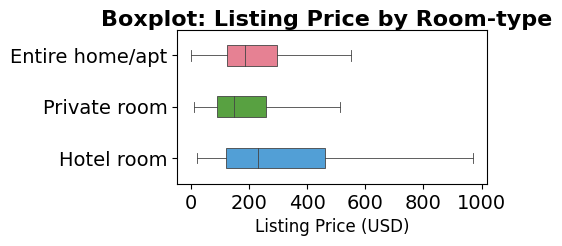

In [ ]:
# Set the figure size
plt.figure(figsize=(4, 2))

# Create a new DataFrame with the selected columns
dft = listings_df[["room_type", "price"]]

# Create the boxplot
sns.boxplot(x='price', y='room_type', data=dft, order=['Entire home/apt', 'Private room', 'Hotel room'],
            showfliers=False, palette="husl", linewidth=0.6, width=0.4)

# Get the current axes
ax = plt.gca()

# Set the title and labels
ax.set_title("")
ax.set_xlabel("Listing Price (USD)", fontsize=12)
ax.set_ylabel("")

# Set the super title
plt.suptitle("Boxplot: Listing Price by Room-type", fontweight="bold", fontsize=16)

# Set the font size of y-axis labels
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)

# Set the font size of x-axis labels
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)

# Display the plot
plt.show()

The chart describes the distribution of listed prices based on different room types.

* Both "Entire home/apt" and "Private room" have significantly lower price ranges compared to "Hotel room," indicating a more stable market.
* The median prices for both "Entire home/apt" and "Private room" are much lower than "Hotel room," and both distributions are right-skewed, indicating a concentration of data around the 170-190 USD range.
* The price variability for "Entire home/apt" and "Private room" is also lower compared to "Hotel room," as indicated by the smaller box size and a narrower range of approximately 100-250 USD.

* Conversely, the price range for "Hotel room" is quite wide, with 50% of the data falling between 150 and nearly 450 USD. However, the majority of prices still remain below 220 USD, although there are some higher-priced and even extremely high-priced hotel rooms.

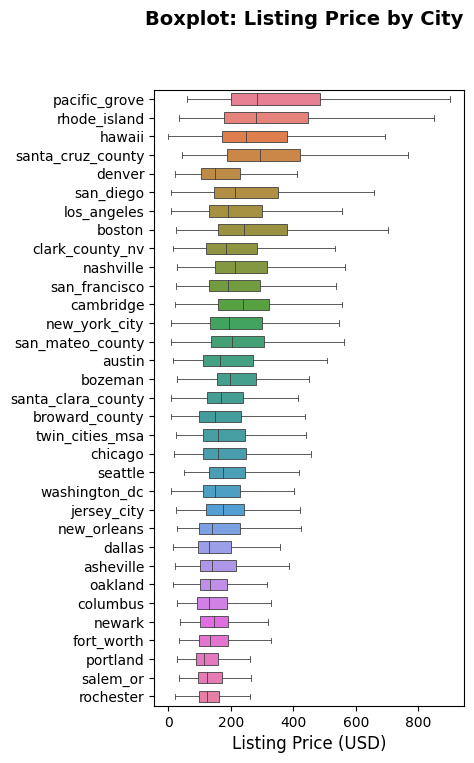

In [ ]:
# Calculate the average value of "Price" by each "City" and sort descending
df1 = listings_df.groupby("city").filter(lambda x: len(x) > 0)
df1 = df1.groupby("city").mean()["price"].reset_index().sort_values("price", ascending=False)

# Create a copy of the DataFrame "listings_df" containing only the two columns "City" and "Price"
dft = listings_df[["city", "price"]].copy()

#  Draw boxplot
plt.figure(figsize=(4, 8))
sns.boxplot(x='price', y='city', data=dft, order=df1["city"].values,
            showfliers=False, palette="husl", linewidth=0.6, width=0.6)

# Title and axis label settings
ax = plt.gca()
ax.set_title("")
ax.set_xlabel("Listing Price (USD)", fontsize=12)
ax.set_ylabel("")
plt.suptitle("Boxplot: Listing Price by City", fontweight="bold", fontsize=14)

# Adjust the font size of axis labels
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(10)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(10)

plt.show()

- Pacific Grove, Rhode Island, Hawaii, Santa Cruz County, Denver have amongst the highest average (about 200-400 USD) and PortLand, Salem Or, Rochester have the has the lowest rental house prices (about 100 USD).

- As expected, it can be argued that cities with high rental prices are indicative of tourist attractions and popularity, and vice versa.



Calculates the Pearson correlation coefficients between the "price" column and all other columns in the DataFrame ``listings_df``, selects the features that have a correlation coefficient greater than 0.1, and displays them along with their correlation values in the DataFrame ``df1``.

In [ ]:
# Calculate correlations between features and price using Pearson's method
dfc = pd.DataFrame(listings_df.corr(method="pearson")["price"])

# Restructure the correlation results into a DataFrame
dfc.reset_index(inplace=True)
dfc.columns = ["features", "correlation_with_price"]

# Sort features by their correlation with price in descending order
dfc.sort_values("correlation_with_price", ascending=False, inplace=True)

# Filter for features with a correlation greater than 0.1
df1 = dfc[dfc["correlation_with_price"] > 0.1]

# Extract the names of correlated features
corr_features = df1["features"].values

# Add the "price" feature to the list of correlated features
corr_features.tolist().append("price")

# Display the DataFrame of correlated features
df1

,features,correlation_with_price
9,price,1.000000
7,bedrooms,0.184469
6,accommodates,0.172554
8,beds,0.162487


The result indicates that the "bedrooms", "accommodates", and "beds" features have a positive correlation with the "price". This suggests that the number of bedrooms, accommodation capacity, and the number of beds in a listing significantly influence the price in the Airbnb marketplace. The higher the correlation value, the more these features tend to increase, the higher the price tends to be.

The following figures show the distribution of various features like ``accomodates``, ``beds`` and ``bedrooms`` with the listing price. This will aid in determining which features are correlated with the listing price and can thereby result in the Models making better predictions.

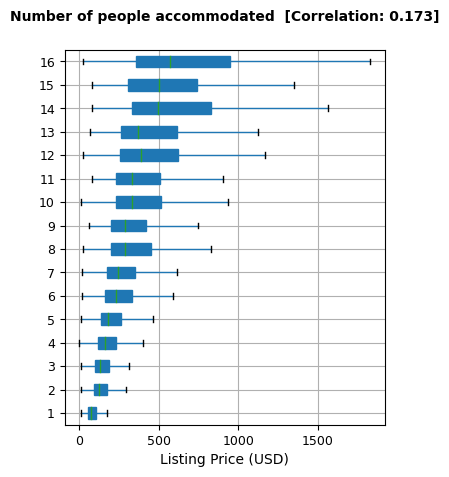

In [ ]:
# Select the "accommodates" feature for analysis
col = "accommodates"

# Retrieve the correlation coefficient for "accommodates" with price
cov = np.round(dfc[dfc["features"] == col]["correlation_with_price"].values[0], 3)

# Create a descriptive title for the plot
suptitle = "Number of people accommodated  [Correlation: " + str(cov) + "]"
plt_name = "accommodates"

# Prepare a DataFrame with "accommodates" and "price" columns
dft = listings_df[[col, "price"]].copy()

# Ensure "accommodates" is an integer type for proper boxplot grouping
dft[col] = dft[col].astype(int)

# Create a horizontal boxplot, visualizing price distribution for each number of beds
dft.boxplot(by=col, showfliers=False, figsize=(4, 5), vert=False, patch_artist=True)

ax = plt.gca()
ax.set_title("")
ax.set_xlabel("Listing Price (USD)", fontsize=10)
ax.set_ylabel("")
plt.suptitle(suptitle, fontweight="bold", fontsize=10)

# Adjust tick label font sizes for better readability
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(9)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(9)

Based on the "Accommodation" and "Price" charts for Airbnb listings, here are some observations about the relationship between occupancy and price:

* There is a positive relationship between accommodation capacity and price. This means that accommodations that can accommodate more people often cost more.
* **Average prices increase according to accommodation capacity.** For example, accommodations that can accommodate 2 people cost an average of \$100, while accommodations that can accommodate 10 people cost an average of \$250.
* **Wider price range according to accommodation capacity.** For example, accommodations that can accommodate 2 people range in price from \$50 to \$150, while accommodations that can accommodate 10 people range in price from \$150 to \$500.
* **The frequency of different price levels decreases with accommodation capacity.** For example, accommodations that can accommodate 2 people have a wider range of prices than accommodations that can accommodate 10 people.

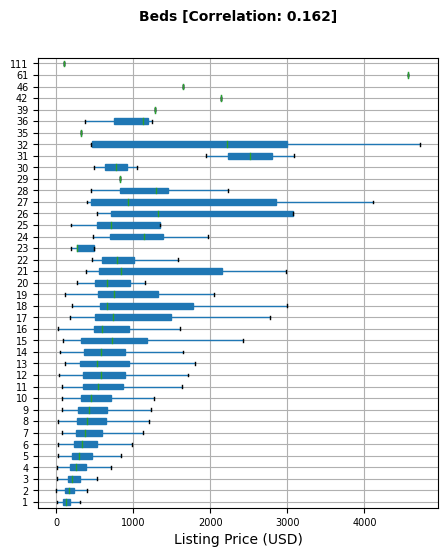

In [ ]:
# Select the "beds" feature for analysis
col = "beds"

# Retrieve the correlation coefficient for "beds" with price
cov = np.round(dfc[dfc["features"] == col]["correlation_with_price"].values[0], 3)

# Create a descriptive title for the plot
suptitle = "Beds [Correlation: " + str(cov) + "]"

# Prepare a DataFrame with "beds" and "price" columns
dft = listings_df[[col, "price"]].copy()

# Ensure "beds" is an integer type for proper boxplot grouping
dft[col] = dft[col].astype(int)

# Create a horizontal boxplot, visualizing price distribution for each number of beds
dft.boxplot(by=col, showfliers=False, figsize=(5, 6), vert=False, patch_artist=True )

# Customize plot elements
ax = plt.gca()
ax.set_title("")
ax.set_xlabel("Listing Price (USD)", fontsize=10)
ax.set_ylabel("")
plt.suptitle(suptitle, fontweight="bold", fontsize=10)

# Adjust tick label font sizes for better readability
for tick in ax.yaxis.get_major_ticks():
   tick.label.set_fontsize(7)
for tick in ax.xaxis.get_major_ticks():
   tick.label.set_fontsize(7)

This chart shows the relationship between the number of beds in an Airbnb property and the price of that property.

Accommodations with more beds tend to cost more. This is because properties with more beds tend to be larger, have more advanced amenities, or are located in a more convenient location.

Here are some more specific observations about the chart:
* **The average price increases with the number of beds.** For example, 1-bed properties average \$100, while 10-bed properties average $250.
* **The price range is wider according to the number of beds.** For example, 1-bed properties range in price from \$50 to \$150, while 10-bed properties range in price from \$150 to \$500.
* **The frequency of different prices decreases with the number of beds.** For example, 1-bed properties have a wider range of prices than 10-bed properties.


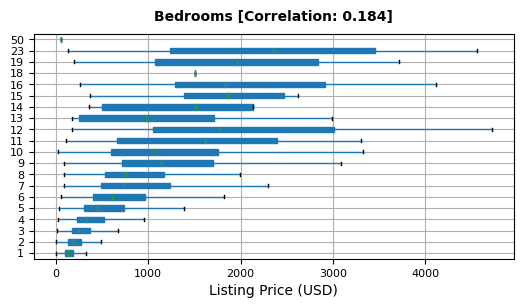

In [ ]:
# Select the "bedrooms" feature for analysis
col = "bedrooms"

# # Remove more than 14 bedrooms (outliers)
# listings_df = listings_df[listings_df["bedrooms"] <= 14]

# Retrieve the correlation coefficient for "bedrooms" with price
cov = np.round(dfc[dfc["features"] == col]["correlation_with_price"].values[0], 3)

# Create a descriptive title for the plot
suptitle = "Bedrooms [Correlation: " + str(cov) + "]"

# Prepare a DataFrame with "bedrooms" and "price" columns
dft = listings_df[[col, "price"]].copy()

# Ensure "bedrooms" is an integer type for proper boxplot grouping
dft[col] = dft[col].astype(int)

# Create a horizontal boxplot, visualizing price distribution for each number of bedrooms
dft.boxplot(by=col, showfliers=False, figsize=(6, 3), vert=False, patch_artist=True)

# Customize plot elements
ax = plt.gca()
ax.set_title("")
ax.set_xlabel("Listing Price (USD)", fontsize=10)
ax.set_ylabel("")
plt.suptitle(suptitle, fontweight="bold", fontsize=10)  # Set the descriptive title

# Adjust tick label font sizes for better readability
for tick in ax.yaxis.get_major_ticks():
   tick.label.set_fontsize(8)
for tick in ax.xaxis.get_major_ticks():
   tick.label.set_fontsize(8)



Based on the "Bedrooms" and "Price" chart for Airbnb listings, here are some observations about the relationship between bedroom count and price:
* There is a positive relationship between number of bedrooms and price. This means properties with multiple bedrooms tend to cost more.
* **The average price increases with the number of bedrooms.** For example, 1-bedroom properties average \$100, while 3-bedroom properties average \$200.
* **The price range is wider according to the number of bedrooms.** For example, 1-bedroom properties range in price from \$50 to \$150, while 3-bedroom properties range in price from \$150 to \$300.
* **The frequency of different price ranges decreases with the number of bedrooms.** For example, 1-bedroom properties have a wider range of prices than 3-bedroom properties.

## Encoding

In the encoding step, it is necessary to convert all columns containing text into a numerical format. This process, known as feature encoding or feature transformation, ensures that the data can be used effectively in machine learning algorithms.

Using a simple technique called "mapping" to convert the values of binary categorical columns to numeric format.

In [ ]:
# Identify binary categorical columns to convert
binary_columns = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable', 'has_availability']

# Iterate through each binary column and convert its values to numeric
for col in binary_columns:
   # Use a lambda function to map 't' to 1 and all other values to 0
   listings_df[col] = listings_df[col].map(lambda x: 1 if x == 't' else 0)

Converts the columns `amenities` and `host_verifications`, which contain string lists, into separate rows for each individual value in the list.

In [ ]:
# Identify columns to process
columns_need = ['amenities', 'host_verifications']

# Convert string lists to Python lists
for col in columns_need:
    # Remove square brackets from string list
    listings_df[col] = listings_df[col].apply(lambda x: x.strip('[]'))

    # Split string list into individual values
    listings_df[col] = listings_df[col].apply(lambda x: x.split(', '))

    # Expand list values into separate rows
    listings_df[col] = listings_df[col].explode(f'col').reset_index(drop=True)


If we don't split the values into separate rows before using dummies encoding, each row of the columns will be treated as a string list, and it will be processed as a single unit by the model.

In [ ]:
# Perform one-hot encoding on room_type, host_response_time, host_verifications, amenities, city columns
listings_df = pd.get_dummies(listings_df, columns=['room_type', 'host_response_time','amenities', 'host_verifications','city'], prefix='', prefix_sep='')

In [ ]:
listings_df.shape

(137919, 985)

In [ ]:
pd.set_option('display.max_columns', None) # Set display option to show all columns
listings_df.columns.to_list() # Get the list of column names

['id',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_total_listings_count',
 'host_has_profile_pic',
 'host_identity_verified',
 'latitude',
 'longitude',
 'accommodates',
 'bedrooms',
 'beds',
 'price',
 'minimum_nights',
 'maximum_nights',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'instant_bookable',
 'reviews_per_month',
 'Entire home/apt',
 'Hotel room',
 'Private room',
 'a few days or more',
 'within a day',
 'within a few hours',
 'within an hour',
 '"10-cu. ft refrigerator/freezer (apartment sized) refrigerator"',
 '"24\\" HDTV with Amazon Prime Video',
 '"25\\" HDTV with DVD player"',
 '"25\\" HDTV with Roku"',
 '"27\\" TV"',
 '"28\\" HDTV with Fire TV',
 '"30\\" HDTV with HBO 

In [ ]:
listings_df.head(10)

id  host_response_rate  host_acceptance_rate  host_is_superhost  \
0   3314819                1.00                  0.99                  1   
1    108061                1.00                  0.88                  1   
2    155305                1.00                  0.99                  0   
6    209068                0.67                  0.86                  1   
8    259576                1.00                  1.00                  1   
9    304379                1.00                  0.22                  0   
10   314540                1.00                  1.00                  0   
11   427497                1.00                  1.00                  0   
12   436476                1.00                  1.00                  1   
13   483384                1.00                  1.00                  1   

    host_total_listings_count  host_has_profile_pic  host_identity_verified  \
0                         3.0                     1                       1   
1                         3.0                     1                       1   
2                        11.0                     1                       1   
6                         1.0                     1                       1   
8                         2.0                     1                       1   
9                         2.0                     1                       0   
10                        4.0                     1                       1   
11                        1.0                     1                       0   
12                        5.0                     1                       1   
13                        2.0                     1                       1   

    latitude  longitude  accommodates  bedrooms  beds  price  minimum_nights  \
0   35.49233  -82.51495             3       1.0   1.0   47.0               1   
1   35.60562  -82.55512             2       1.0   1.0  100.0              30   
2   35.57864  -82.59578             2       1.0   1.0  100.0               1   
6   35.61736  -82.55074             4       1.0   2.0   95.0              30   
8   35.61966  -82.48065             2       1.0   1.0   83.0               2   
9   35.64408  -82.52508             2       2.0   2.0  219.0              30   
10  35.58561  -82.62731             8       4.0   5.0  292.0               1   
11  35.49088  -82.48602             2       1.0   1.0  159.0               2   
12  35.60153  -82.56040             3       1.0   1.0  131.0               2   
13  35.56921  -82.57349             3       1.0   1.0  146.0               1   

    maximum_nights  has_availability  availability_30  availability_60  \
0                7                 1               17               39   
1              365                 1                0                2   
2              365                 1               22               39   
6              360                 1               17               27   
8               30                 1                2                4   
9              365                 1                0                0   
10              30                 1                9               23   
11              90                 1               19               45   
12              60                 1               10               18   
13            1125                 1                3               11   

    availability_90  availability_365  number_of_reviews  \
0                66                66               1234   
1                32               203                 92   
2                65               268                400   
6                27               187                 61   
8                 4                71                798   
9                 0               224                 24   
10               36               230                 11   
11               75               350                 48   
12               38                61                381   
13    

In [ ]:
dtype_list = {}
for col in listings_df.columns:
  tmp = listings_df[col].dtype
  if tmp not in dtype_list:
    dtype_list[tmp] = 1
  else:
    dtype_list[tmp] += 1

All data has been one-hot encoded, converted to numerical format.

<a id='introduction'></a>
# Building model

In this step, we choose to use `CatBoostRegressor` model, which is a modern machine learning model in order to gain the best performance.

About data, we chose to use train-test ratio as 8:2, and in training step, we choose to use train-valid ratio as 8:2, with random seed 2023.

In [ ]:
# Define model
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
import optuna
from sklearn.preprocessing import StandardScaler
from pickle import dump

# Choose target and training features
X = listings_df.drop(['price', 'id'], axis = 1)
y = listings_df['price']

# Split data into training set and testing set with ratio 8:2
train_step_X, _test_X, train_step_y, test_y = train_test_split(X, y, train_size = 0.8, random_state = 2023)
# Split training data into training set and eval set with ratio 8:2
_train_X, _valid_X, train_y, valid_y = train_test_split(train_step_X, train_step_y, train_size = 0.8, random_state = 2023)
# Normalization data
scaler = StandardScaler()
scaler.fit(_train_X)
train_X = scaler.transform(_train_X)
valid_X = scaler.transform(_valid_X)
test_X = scaler.transform(_test_X)
# Save scaler for future use
dump(scaler, open('scaler.pkl', 'wb'))
# Using 10% of training data for hyperparameters tunning
tunning_train_X, _, tunning_train_y, __ = train_test_split(train_X, train_y, train_size = 0.1, random_state = 2023)
tunning_valid_X, _, tunning_valid_y, __ = train_test_split(valid_X, valid_y, train_size = 0.1, random_state = 2023)

## Hyperparameter tunning

Hyperparameters tunning is an important part that we have to do before training this model. In this step, we will finetune `learning_rate`, `depth`, `subsample` and `min_data_in_leaf` using Newton method via `optuna` package with 30 epochs.

In [ ]:
from sklearn.metrics import mean_squared_error

# Create objective for optuna to finetune hyperparameters
def objective(trial):
  params = {
      "iterations": 1000,
      "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
      "depth": trial.suggest_int("depth", 1, 10),
      "subsample": trial.suggest_float("subsample", 0.05, 1.0),
      "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
  }

  model = CatBoostRegressor(**params, silent=True, task_type="GPU", random_seed = 2023, bootstrap_type='Poisson')
  model.fit(tunning_train_X, tunning_train_y)
  predictions = model.predict(tunning_valid_X)
  rmse = mean_squared_error(tunning_valid_y, predictions, squared=False)
  return rmse

# Hyperparameters tunning
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)

[I 2023-12-20 14:27:35,509] A new study created in memory with name: no-name-5fd293b7-063a-4c90-a568-6733fa907a2a
[I 2023-12-20 14:27:46,898] Trial 0 finished with value: 305.00444113434656 and parameters: {'learning_rate': 0.00924503620477121, 'depth': 1, 'subsample': 0.5369300147951718, 'min_data_in_leaf': 87}. Best is trial 0 with value: 305.00444113434656.
[I 2023-12-20 14:27:59,371] Trial 1 finished with value: 290.54953328192903 and parameters: {'learning_rate': 0.00313753344977432, 'depth': 4, 'subsample': 0.09700303109466771, 'min_data_in_leaf': 1}. Best is trial 1 with value: 290.54953328192903.
[I 2023-12-20 14:28:15,232] Trial 2 finished with value: 395.7059258096733 and parameters: {'learning_rate': 0.04645552326122546, 'depth': 6, 'subsample': 0.160900621822408, 'min_data_in_leaf': 92}. Best is trial 1 with value: 290.54953328192903.
[I 2023-12-20 14:28:26,489] Trial 3 finished with value: 295.9765943281598 and parameters: {'learning_rate': 0.006294647216082405, 'depth': 2

This is the best hyperparameters are found after tunning step, we will use these as our model hyperparameters in main training step.

In [ ]:
print('Best hyperparameters:', study.best_params)
print('Best RMSE:', study.best_value)

Best hyperparameters: {'learning_rate': 0.002472723429348549, 'depth': 9, 'subsample': 0.782090226386148, 'min_data_in_leaf': 72}
Best RMSE: 288.0980508773932


## Traning model

To boost training speed, we choose to use GPU (`T4 GPU` in Google Colab) and keep the best model (lowest cost).

In [ ]:
# Training model
# We training on GPU and choose to use best model - means that the model that have the best loss value (minimal)
model = CatBoostRegressor(**study.best_params, iterations = 50000, silent=True, task_type="GPU", random_seed=2023, bootstrap_type='Poisson', use_best_model=True)
model.fit(train_X, train_y, eval_set=(valid_X, valid_y), verbose= 1000)

0:	learn: 713.6271998	test: 1006.0717223	best: 1006.0717223 (0)	total: 18.6ms	remaining: 15m 31s
1000:	learn: 636.4716808	test: 991.1670657	best: 991.1670657 (1000)	total: 10.1s	remaining: 8m 14s
2000:	learn: 588.1989922	test: 989.6722207	best: 989.6667347 (1998)	total: 19.7s	remaining: 7m 53s
3000:	learn: 540.6696713	test: 989.0995478	best: 989.0995478 (3000)	total: 26.6s	remaining: 6m 56s
4000:	learn: 499.3430347	test: 988.7996652	best: 988.7996652 (4000)	total: 36.1s	remaining: 6m 55s
5000:	learn: 459.5421027	test: 988.6046528	best: 988.5999119 (4996)	total: 1m 1s	remaining: 9m 12s
6000:	learn: 423.2074237	test: 988.4547651	best: 988.4547651 (6000)	total: 1m 11s	remaining: 8m 41s
7000:	learn: 391.9540408	test: 988.3355617	best: 988.3355617 (7000)	total: 1m 18s	remaining: 7m 59s
8000:	learn: 365.8929355	test: 988.2767763	best: 988.2694983 (7996)	total: 1m 27s	remaining: 7m 40s
9000:	learn: 342.7772439	test: 988.3144801	best: 988.2694983 (7996)	total: 1m 37s	remaining: 7m 22s
10000:	l

Text(0.5, 1.0, 'Feature Importance')

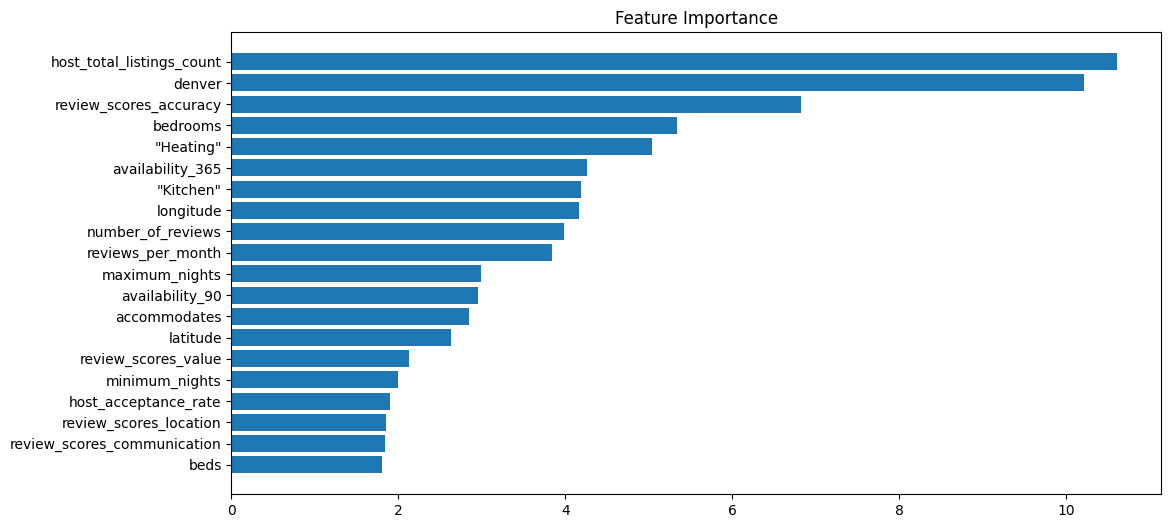

In [ ]:
# Get feature importance information calculating via how it's change when we change these features value
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)[-20:]
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(_train_X.columns)[sorted_idx])
plt.title('Feature Importance')

## Validation

In [ ]:
# Validation step
prediction = model.predict(test_X)
loss = mean_squared_error(test_y, prediction, squared = False)
print("Test loss:", loss)

Test loss: 348.0682564576655


This is not a good cost but with our simple methods, we think it is acceptable.

## Saving model

In [ ]:
# Saving model for later using
model.save_model("cat_model.cbm")

# Demo

We demo our model by a streamlit app.
<div align="center">
<img src="https://cdn.discordapp.com/attachments/907322799713058846/1187198744677072997/qrcode_86580361_6152e09ef07d670a7c33a6ab34490a44.png" width="500"/>
</div>

<a id='introduction'></a>

# Conclusion

The project "Predicting Airbnb Prices in the United States" utilized data from Inside Airbnb to develop a predictive model for estimating Airbnb prices. By analyzing various features such as accomodations, rooms type, amenities,... we gained insights into the factors influencing Airbnb pricing strategies.

The developed predictive model provides a valuable tool for hosts and guests in the Airbnb ecosystem. Hosts can optimize their pricing strategies based on the identified factors, while guests can make informed decisions when selecting accommodations.

However, it is important to recognize that the model is based on historical data and may not capture real-time market conditions. Thus, interpreting the predictions should consider current market dynamics.

In conclusion, this project contributes to understanding Airbnb pricing strategies and offers a reliable tool for predicting prices in the United States. It enhances decision-making for hosts and guests, facilitating a better user experience in the short-term rental market.

<a id='introduction'></a>

# References

[sklearn.preprocessing.OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

[CatBoostRegressor](https://catboost.ai/en/docs/concepts/python-reference_catboostregressor)

[Optuna](https://viblo.asia/p/tu-dong-dieu-chinh-sieu-tham-so-voi-optuna-va-pytorch-RQqKLe00Z7z)

[Predictive Price Modeling for Airbnb listings](https://www.deepakkarkala.com/docs/articles/machine_learning/airbnb_price_modeling/about/index.html#introduction)

**Team 4**

| Name | MSSV | Contribution rate (%) |
| -------- | -------- | -------- |
| Nguyễn Phúc Gia Nghi | 21280035 | 100% |
| Lê Hồ Hoàng Anh | 21280085 | 100% |
| Nguyễn Hải Ngọc Huyền | 21280091 | 100% |
| Tạ Hoàng Kim Thy | 21280083 | 100% |